In [5]:
from src.functions import *

**Problema 4**: Considere a integral de uma função $f(\boldsymbol{x})$ em um espaço de $d$ dimensões. A integral pode ser expressa como:
$$
    I = \int_{[0,1]^d} f(\boldsymbol{x})d\boldsymbol{x}.
$$

**(a)**: Utilize Monte Carlo para estimar a integral acima. Gere N vetores $\boldsymbol{x}$ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $d = 1$ e $f(\boldsymbol{x}) = e^{-|\boldsymbol{x}|^2}$.

**(b)**: Para diferentes valores de $d$ ($d = 2,6,10$), estude como o número de amostras $N$ necessário para alcançar a precisão desejada varia com a dimensionalidade.

**(c)**: Calcule o erro padrão da média para cada caso e analise a taxa de convergência.

### **Item (a)**

In [6]:
#d=1 é a dimensão
d=1
N = 100000  # Número de amostras
I=(0.746824)**d
resultado = integral_I(N, d)
print(f"Valor aproximado da integral: {resultado} para d={d}")
print(f"valor teórico: {I}")
diferenca = abs((resultado - I) / I) * 100
print(f"Diferença do valor real: {diferenca:0.3f}%")

Valor aproximado da integral: 0.7471074926601787 para d=1
valor teórico: 0.746824
Diferença do valor real: 0.038%


### **Item (b)**

In [7]:
# Lista de dimensões e números de amostras
dimensoes = [2, 6, 10]
amostras = [100, 1000, 10000, 100000]# 100000]

for d in dimensoes:
    print(f"\nResultados para d={d}:\n")
    I = (0.746824) ** d  # Valor teórico da integral
    for N in amostras:
        resultado = integral_I(N, d)
        diferenca = abs((resultado - I) / I) * 100
        print(f"N = {N}, Valor aproximado da integral: {resultado}, Valor teórico: {I}")
        print(f"Diferença do valor real: {diferenca:0.10f}%")




Resultados para d=2:

N = 100, Valor aproximado da integral: 0.5292146065275167, Valor teórico: 0.557746086976
Diferença do valor real: 5.1154963010%
N = 1000, Valor aproximado da integral: 0.5511408837048158, Valor teórico: 0.557746086976
Diferença do valor real: 1.1842670752%
N = 10000, Valor aproximado da integral: 0.553204777623877, Valor teórico: 0.557746086976
Diferença do valor real: 0.8142252287%
N = 100000, Valor aproximado da integral: 0.5580601325409177, Valor teórico: 0.557746086976
Diferença do valor real: 0.0563061888%

Resultados para d=6:

N = 100, Valor aproximado da integral: 0.16494743663241923, Valor teórico: 0.17350404178504858
Diferença do valor real: 4.9316460093%
N = 1000, Valor aproximado da integral: 0.17216497449655266, Valor teórico: 0.17350404178504858
Diferença do valor real: 0.7717787290%
N = 10000, Valor aproximado da integral: 0.17322704417006787, Valor teórico: 0.17350404178504858
Diferença do valor real: 0.1596490849%
N = 100000, Valor aproximado da 

In [10]:
import pandas as pd

# Dimensões e números de amostras
dimensoes = [2, 6, 10]
amostras = [100, 1000, 10000, 100000,1000000]

# Criar uma lista para armazenar os resultados
resultados = []
for N in amostras:
    for d in dimensoes:
        I = (0.746824) ** d  # Valor teórico
        resultado = integral_I(N, d)  # Chamada da função
        diferenca = abs((resultado - I) / I) * 100  # Diferença percentual
        # Armazenar os dados como uma linha
        resultados.append({
            "Dimensão (d)": d,
            "Amostras (N)": N,
            "Diferença (%)": diferenca
        })

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibir a tabela
print(df_resultados)

# Opcional: salvar a tabela em um arquivo CSV
df_resultados.to_csv("resultados_integral.csv", index=False)


    Dimensão (d)  Amostras (N)  Diferença (%)
0              2           100       0.680219
1              6           100       7.302937
2             10           100      27.118137
3              2          1000       1.393735
4              6          1000       3.691623
5             10          1000       1.897039
6              2         10000       0.022185
7              6         10000       0.045107
8             10         10000       0.623251
9              2        100000       0.073706
10             6        100000       0.076622
11            10        100000       0.581953
12             2       1000000       0.051296
13             6       1000000       0.021882
14            10       1000000       0.052291


In [9]:
# Função para calcular erro padrão da média e a taxa de convergência
def convergence_rate(d, N_samples_list):
    """
    Calcula o erro padrão da média e taxa de convergência para diferentes números de amostras.
    
    Args:
        d (int): Dimensão da integral.
        N_samples_list (list of int): Lista com o número de amostras.
    
    Returns:
        tuple: Lista de erros padrão da média e taxas de convergência.
    """
    errors = []
    for N in N_samples_list:
        estimates = [integral_I(N, d) for _ in range(10)]  # Média em 10 execuções
        error_std = np.std(estimates)                                # Erro padrão
        errors.append(error_std)
    
    # Calcula a taxa de convergência: log-log slope
    log_N = np.log(N_samples_list)
    log_errors = np.log(errors)
    slope = np.polyfit(log_N, log_errors, 1)[0]  # Coeficiente angular da reta
    return errors, slope

# Parâmetros
dimensions = [2, 6, 10]
N_samples_list = [10**i for i in range(2,7)]  # Amostras variando de 10^2 a 10^6


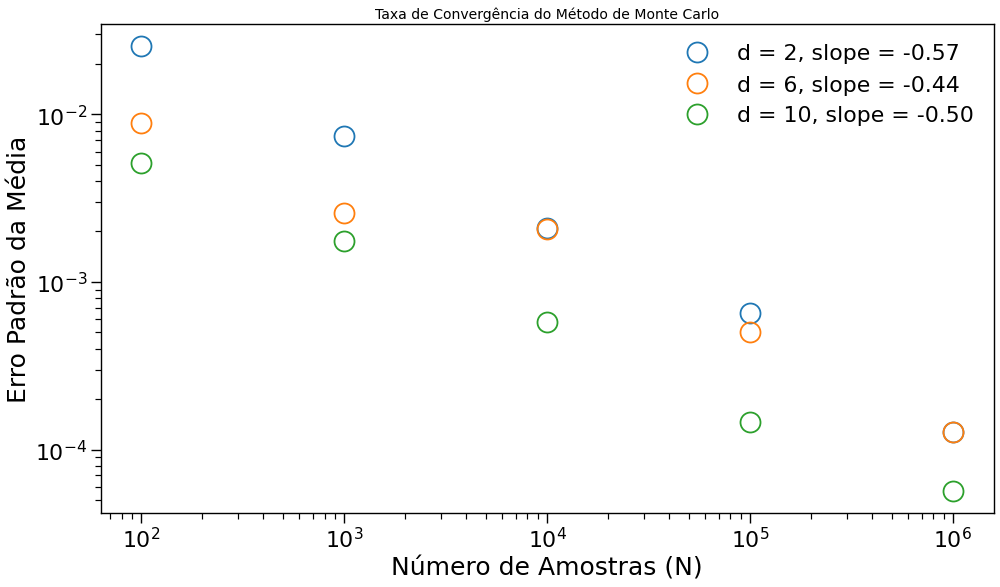

In [6]:
# Plotagem
plt.figure(figsize=(16, 9))
for d in dimensions:
    errors, slope = convergence_rate(d, N_samples_list)
    plt.plot(N_samples_list, errors, 'o', label=f'd = {d}, slope = {slope:.2f}', mfc="None", ms=20, mew=1.8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Amostras (N)', size=25)
plt.ylabel('Erro Padrão da Média', size=25)

# Configurações dos ticks
plt.tick_params('both', which='major', width=1.4, length=10, labelsize=22)  # Major ticks
plt.tick_params('both', which='minor', width=1.2, length=6, labelsize=18)   # Minor ticks
plt.minorticks_on()  # Ativa os minor ticks

plt.title('Taxa de Convergência do Método de Monte Carlo', fontsize=14)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.show()
